In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from tqdm import tqdm_notebook

e = 4.8e-10
d = 2
n_0 = 1e8
m = 1.67e-24
c = 3e10

ro = 0
u = 0
dtay = 1/100
tay = 0

a_max = np.pi * e**2 * n_0 * d / m
a = a_max/2
a_z = 0

alpha = a*d/c**2
beta = e**2 * n_0 * d**2 / (m * c**2)

ro_list = []
u_list = []
tay_list = []
W_list = []
W_z_list = []
l_list = []
a_z_list = []

l = 0

for i in tqdm_notebook(np.arange(0, 3.2224e6, 1)):
    
    ro += u*dtay
    u = u -  alpha*dtay + beta*(-2*np.pi*ro - np.sin(4*np.pi*ro)/2)*dtay
    l = alpha * d * tay**2 / 2
    a_z = e**2 * n_0 * d * (2 * np.pi * ro + 1/2 * np.sin(4*np.pi*ro))/m
    tay += dtay
    
    W_list.append(np.pi*e**2 * n_0 * l * d)
    W_z_list.append(m/2 * (a*tay*d/c + u*c)**2)
    
    a_z_list.append(a_z)
    l_list.append(l)
    ro_list.append(ro)
    u_list.append(u)
    tay_list.append(tay)

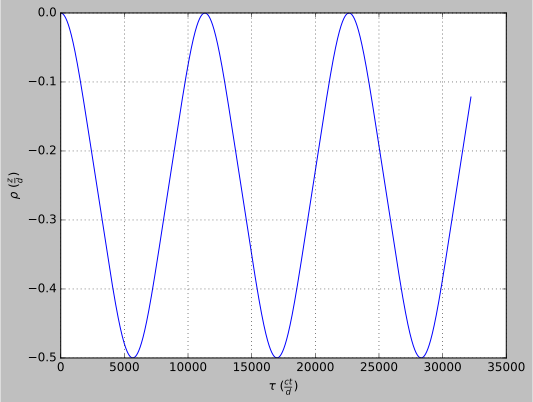

In [2]:
with plt.style.context('classic'):
    plt.plot(np.array(tay_list), np.array(ro_list))
    plt.xlabel(r'$\tau$ $(\frac{ct}{d})$')
    plt.ylabel(r'$\rho$ $(\frac{z}{d})$')
    plt.grid(True)
    plt.savefig('laba3_1.png')

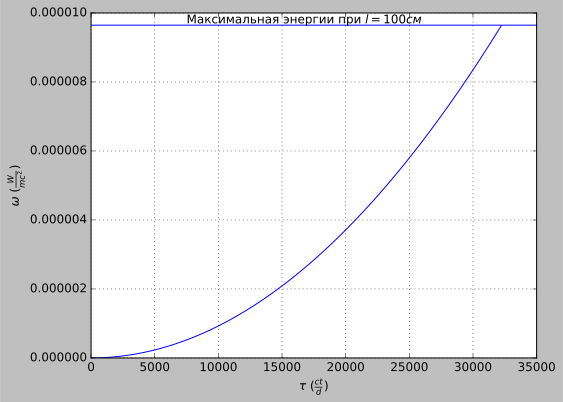

In [3]:
with plt.style.context('classic'):
    plt.plot(np.array(tay_list), np.array(W_list)/(m*c**2))
    plt.axhline(9050/(m*c**2 * 6.242e+11))
    plt.text(x=7500, y=9100/(m*c**2 * 6.242e+11), s="Максимальная энергии при $l = 100 см$")
    plt.xlabel(r'$\tau$ $(\frac{ct}{d})$')
    plt.ylabel(r'$\omega$ $(\frac{W}{mc^2})$')
    plt.grid(True)    
    plt.savefig('laba3_1.png')

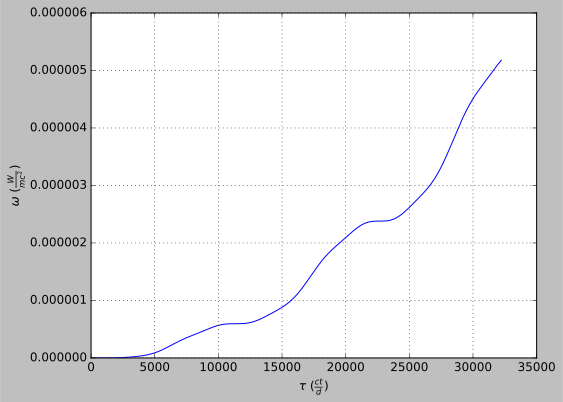

In [4]:
with plt.style.context('classic'):
    plt.plot(np.array(tay_list), np.array(W_z_list)/(m*c**2))
    plt.xlabel(r'$\tau$ $(\frac{ct}{d})$')
    plt.ylabel(r'$\omega$ $(\frac{W}{mc^2})$')
    plt.grid(True)
    plt.savefig('laba3_3.png')

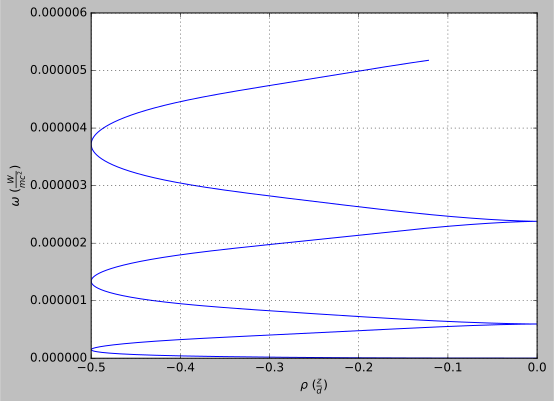

In [5]:
with plt.style.context('classic'):
    plt.plot(np.array(ro_list), np.array(W_z_list)/(m*c**2))
    plt.xlabel(r'$\rho$ $(\frac{z}{d})$')
    plt.ylabel(r'$\omega$ $(\frac{W}{mc^2})$')
    plt.grid(True)
    plt.savefig('laba3_4.png')    